WEEK 10:
Implement Perceptron Learning Algorithm.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load data
df = pd.read_csv('recruitment_data.csv')

In [6]:
# Encode categorical features if necessary
# Assuming 'Gender' and 'RecruitmentStrategy' are categorical
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['RecruitmentStrategy'] = label_encoder.fit_transform(df['RecruitmentStrategy'])

In [7]:

# Split the data
X = df.drop(['HiringDecision'], axis=1)
y = df['HiringDecision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [10]:
# Predict and evaluate
y_pred = perceptron.predict(X_test)
print("Perceptron Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Perceptron Classifier
Accuracy: 0.8033333333333333
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       215
           1       0.64      0.69      0.67        85

    accuracy                           0.80       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.81      0.80      0.81       300



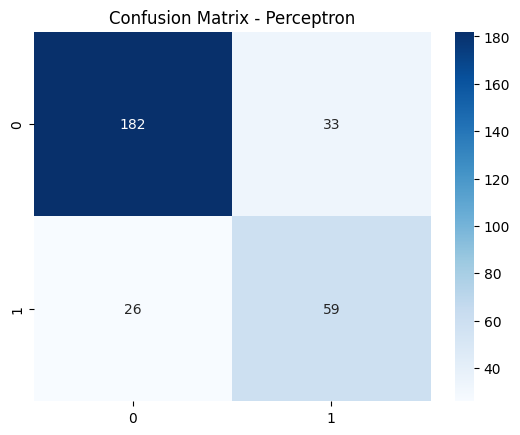

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Perceptron')
plt.show()